<a href="https://colab.research.google.com/github/Prateek-Bhatt/Personal-Projects/blob/main/Medical_Insurance_Cost_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Importing the dataset

In [33]:
dataset = pd.read_csv('insurance.csv')

In [34]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
dataset.shape


(1338, 7)

In [38]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


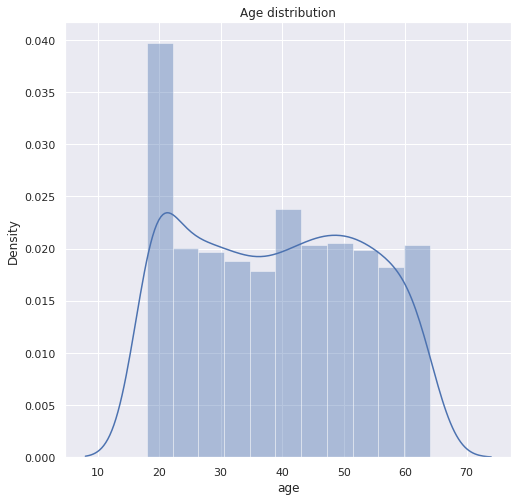

In [39]:
sns.set()
plt.figure(figsize = (8, 8))
sns.distplot(dataset['age'])
plt.title('Age distribution')
plt.show()

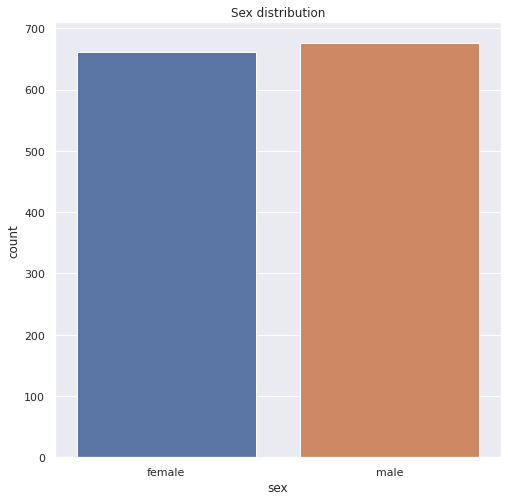

In [40]:
plt.figure(figsize = (8, 8))
sns.countplot(x = 'sex', data = dataset)
plt.title('Sex distribution')
plt.show()

In [41]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


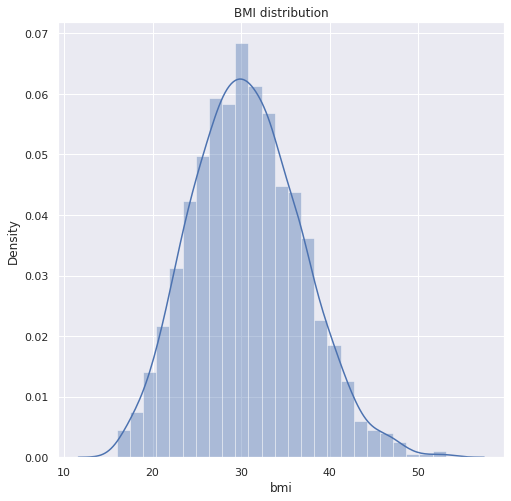

In [42]:
plt.figure(figsize = (8, 8))
sns.distplot(dataset['bmi'])
plt.title('BMI distribution')
plt.show()

<Figure size 576x576 with 0 Axes>

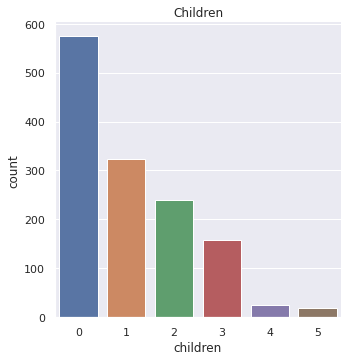

In [43]:
plt.figure(figsize = (8, 8))
sns.catplot(x = 'children', data = dataset, kind = 'count')
plt.title('Children')
plt.show()


In [44]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Figure size 576x576 with 0 Axes>

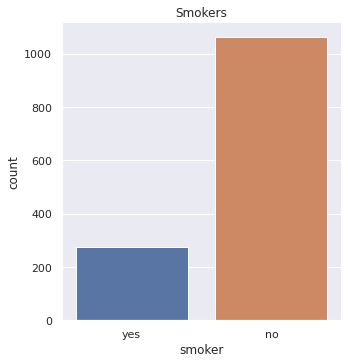

In [45]:
plt.figure(figsize = (8, 8))
sns.catplot(x = 'smoker', data = dataset, kind = 'count')
plt.title('Smokers')
plt.show()


[]

<Figure size 576x576 with 0 Axes>

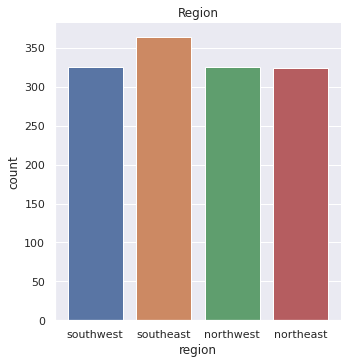

In [46]:
plt.figure(figsize = (8, 8))
sns.catplot(x = 'region', data = dataset, kind = 'count')
plt.title('Region')
plt.plot()

In [47]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

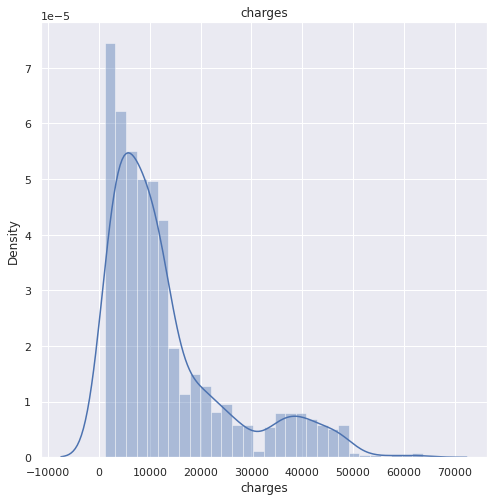

In [48]:
plt.figure(figsize = (8, 8))
sns.distplot(dataset['charges'])
plt.title('charges')
plt.plot()

Data Preprocessing

In [49]:
dataset.replace({'sex': {'male': 0, 'female': 1}, 'smoker': {'yes': 0, 'no': 1},'region': {'southeast': 0, 'southwest': 1, 'northeast': 3, 'northwest': 4}}, inplace = True)

In [50]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,4,21984.47061
4,32,0,28.880,0,1,4,3866.85520


Preparing the dataset

In [51]:
X = dataset.drop(columns = 'charges', axis = 1).values
y = dataset['charges'].values

In [52]:
print(X)

[[19.    1.   27.9   0.    0.    1.  ]
 [18.    0.   33.77  1.    1.    0.  ]
 [28.    0.   33.    3.    1.    0.  ]
 ...
 [18.    1.   36.85  0.    1.    0.  ]
 [21.    1.   25.8   0.    1.    1.  ]
 [61.    1.   29.07  0.    0.    4.  ]]


In [53]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


Splitting the dataset into training and testing data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Training the model on the dataset

In [56]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = regressor.predict(X_test)

Model Evaluation

In [58]:
r2 = metrics.r2_score(y_pred, y_test)


In [59]:
print(r2)

0.7076357451571185


Custom Predictor

In [67]:
input = (18,0,33.77,1,1,3)
input = np.asarray(input)
input = input.reshape(1, -1)
prediction = regressor.predict(input)
print('Insurance Cost:',prediction[0] )

Insurance Cost: 4169.090880006916
